### Time to get your hands dirty. Black-hole binary formation channels with gaussian mixtures.

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset. 

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.

**You want to figure out how many of formation channels are at play.**

The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model, and then train it on the data provided with the `fit` (the data provided are already in the right format!). It will output the trained model, which has various attributes.

Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

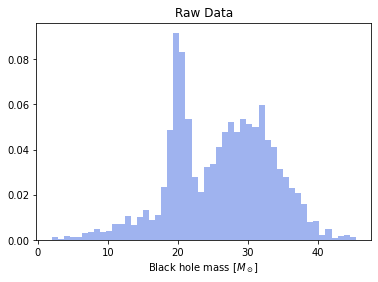

In [3]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline

raw_data = np.load('../../solutions/formationchannels.npy')
raw_hist = plt.hist(raw_data, bins=50, density=True, color='royalblue', alpha=0.5)
plt.title('Raw Data')
plt.xlabel("Black hole mass $[M_\odot]$")
#plt.show()

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

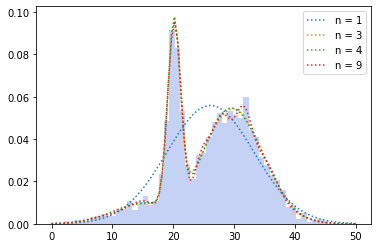

In [76]:
raw_data = np.load('../../solutions/formationchannels.npy')
_ = plt.hist(raw_data, bins=50, color='royalblue', alpha=0.3, density=True)
N_max = 10
N = np.arange(1, N_max+1)
gm = lambda n : GaussianMixture(n_components=n, tol=1e-5, random_state=42).fit(raw_data)

def gauss(x,mu,s,w):
    y = w*np.exp(-(x-mu)**2/(2*s**2))*(np.sqrt(2*np.pi*s**2))**(-1)
    return y

for n in N:
    weights = gm(n).weights_
    means = gm(n).means_
    variances = gm(n).covariances_[:,0,0]
    sigmas = np.sqrt(variances)
    x = np.linspace(0,50,100)
    y = np.zeros(len(x))
    for w, mu, s in zip(weights, means, sigmas):
        y = y + gauss(x,mu,s,w)
    
    if n in [1,3,4,9]: plt.plot(x,y,label='n = '+str(n), ls=':')
plt.legend()

4) For each of this fits, compute the AIC (easy! It's a method of the trained model!). Plot $N$ vs AIC: which model is preferred?

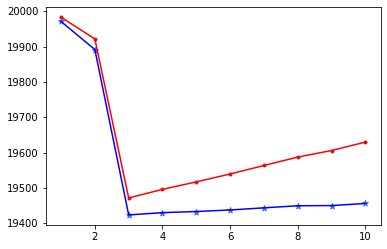

In [84]:
raw_data = np.load('../../solutions/formationchannels.npy')
gm = lambda n : GaussianMixture(n_components=n, tol=1e-5, random_state=42).fit(raw_data)

AIC = [gm(n).aic(raw_data) for n in N]
BIC = [gm(n).bic(raw_data) for n in N]
plt.plot(N,AIC, c='b')
plt.scatter(N,AIC, marker='*', c='royalblue')
plt.plot(N,BIC, c='r')
plt.scatter(N,BIC, marker='.', c='firebrick')

5) Plot the preferred solution and understand which Gaussian mode corresponds to which part of the input dataset.

(1000,) (1000, 1)


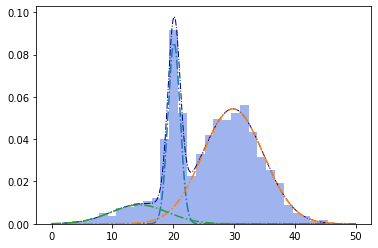

In [98]:
x = np.linspace(0,50,1000)
y = np.exp(gm(3).score_samples(x.reshape(-1, 1))) # restituisce la log_likelihood di un sample
plt.hist(raw_data,density=True,bins=30, color='royalblue', alpha=0.5)
plt.plot(x,y, c='navy', ls='-.', lw=1)

print(np.shape(y), np.shape(y[:,np.newaxis]))

gaussians = gm(3).predict_proba(x.reshape(-1, 1))*y[:,np.newaxis]
## Predict the labels for the data samples in X using trained model.
# onestamente, non ho idea di cosa sia.

# Manca moltiplicare per la .pdf lol
_ = plt.plot(x, gaussians, ls='-.')